In [1]:
import sys, os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
# Compute absolute path to the `src/` folder
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH     = os.path.join(PROJECT_ROOT, "src")

if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)

from utils import get_dataloaders, train_model, plot_training_curves

In [13]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: mps


## Data

In [4]:
COUNTRIES = ["Albania","Andorra","Argentina","Australia","Austria","Bangladesh","Belgium","Bhutan","Bolivia","Botswana","Brazil","Bulgaria","Cambodia","Canada","Chile","Colombia","Croatia","Czechia","Denmark","Dominican Republic","Ecuador","Estonia","Eswatini","Finland","France","Germany","Ghana","Greece","Greenland","Guatemala","Hungary","Iceland","Indonesia","Ireland","Israel","Italy","Japan","Jordan","Kenya","Kyrgyzstan","Latvia","Lesotho","Lithuania","Luxembourg","Malaysia","Mexico","Mongolia","Montenegro","Netherlands","New Zealand","Nigeria","North Macedonia","Norway","Palestine","Peru","Philippines","Poland","Portugal","Romania","Russia","Senegal","Serbia","Singapore","Slovakia","Slovenia","South Africa","South Korea","Spain","Sri Lanka","Sweden","Switzerland","Taiwan","Thailand","Turkey","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay"]
num_classes = len(COUNTRIES)

In [18]:
project_root   = Path().resolve().parent
train_root  = project_root/ "data" / "processed_data" / "small_dataset" / "train"
dev_root  = project_root/ "data" / "processed_data" / "small_dataset" / "dev"


In [19]:
train_loader = get_dataloaders(train_root, batch_size=32)
val_loader = get_dataloaders(dev_root, batch_size=32)

## Model

In [20]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

In [21]:
for param in model.parameters():
    param.data = param.data.to(device)
for buf in model.buffers():
    buf.data = buf.data.to(device)

## Training

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 1e-4)

In [24]:
results = train_model(model, train_loader, val_loader, device, optimizer, project_root/ "models" / "resnet_finetuned" / "prova.pth", criterion=nn.CrossEntropyLoss(), epochs=10, eval_every=50, patience=3)

[Epoch 1/10, Batch 50/198] Train Loss=4.3440, Train Acc=0.0000 | Val Loss=4.3191, Val Acc=0.0430
  ↳ Checkpoint saved.
[Epoch 1/10, Batch 100/198] Train Loss=4.0416, Train Acc=0.1875 | Val Loss=4.1301, Val Acc=0.0924
  ↳ Checkpoint saved.
[Epoch 1/10, Batch 150/198] Train Loss=3.7084, Train Acc=0.1250 | Val Loss=3.8429, Val Acc=0.1253
  ↳ Checkpoint saved.
[Epoch 1/10] Last Batch Train Loss=3.3098, Last Batch Train Acc=0.1875 | Val Loss=3.5291, Val Acc=0.1557
[Epoch 2/10, Batch 200/198] Train Loss=3.4586, Train Acc=0.2188 | Val Loss=3.5149, Val Acc=0.1557
  ↳ Checkpoint saved.
[Epoch 2/10, Batch 250/198] Train Loss=3.0637, Train Acc=0.2812 | Val Loss=3.3520, Val Acc=0.1772
  ↳ Checkpoint saved.
[Epoch 2/10, Batch 300/198] Train Loss=3.0547, Train Acc=0.3125 | Val Loss=3.1849, Val Acc=0.2089
  ↳ Checkpoint saved.
[Epoch 2/10, Batch 350/198] Train Loss=2.5329, Train Acc=0.4375 | Val Loss=3.0482, Val Acc=0.2304
  ↳ Checkpoint saved.
[Epoch 2/10] Last Batch Train Loss=2.9454, Last Batch Tr

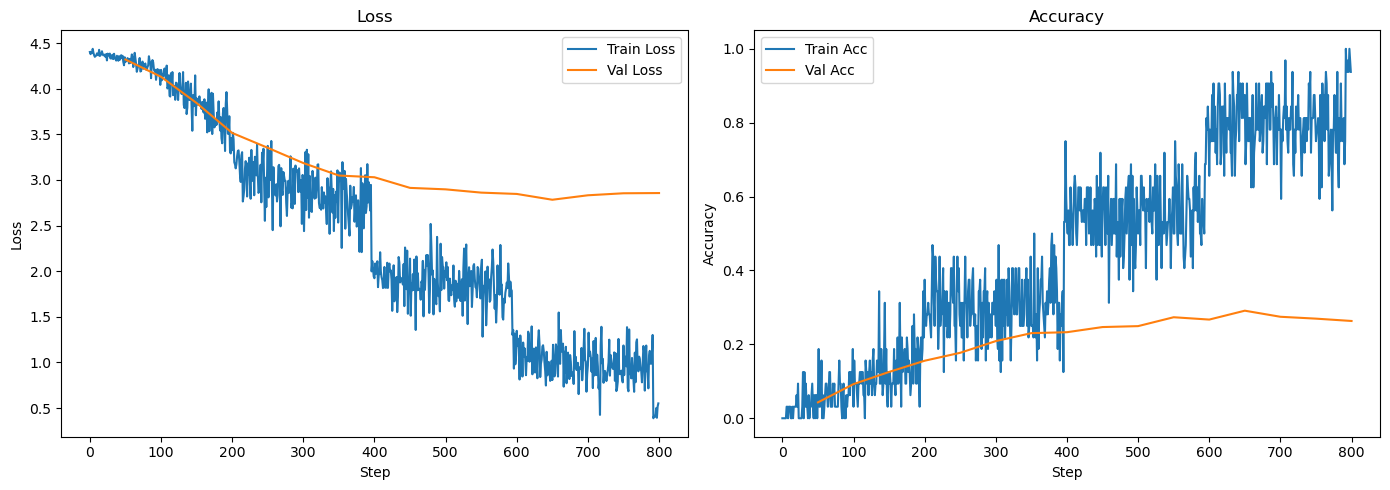

In [ ]:
plot_training_curves(results["train_loss"], results["train_acc"],
                     results["val_loss"], results["val_acc"],
                     eval_every=50)
